In [ ]:
from google.colab import drive
drive.mount('/content/drive/My Drive/Colab Notebooks/numbers.csv')

Mounted at /content/drive/


# Дубликаты

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame({
    'text': ['Поселок Московский', 'посёлок Московский', 'пос. Московский', 'п. Московский', 'Московский']
})

data

,text
0,Поселок Московский
1,посёлок Московский
2,пос. Московский
3,п. Московский
4,Московский


In [ ]:
# приведение к строчным буквам
data['text'] = data['text'].str.lower()
data

,text
0,поселок московский
1,посёлок московский
2,пос. московский
3,п. московский
4,московский


In [ ]:
# удалить слово "поселок"
data['text'] = data['text'].str.replace('поселок ', '')
data

,text
0,московский
1,посёлок московский
2,пос. московский
3,п. московский
4,московский


In [ ]:
# заменить любое из перечисленных слов на пустую строку (т. е. удалить)
# regex=True - включение режима регулярных выражений
data['text'] = data['text'].str.replace('(посёлок |пос. |п. |Поселок )', '')
data

<ipython-input-5-e9fe75870569>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('(посёлок |пос. |п. )', '')


,text
0,Поселок Московский
1,Московский
2,Московский
3,Московский
4,Московский


### Определение дубликатов строк

In [ ]:
data = pd.DataFrame(
    {
        'date': ['2023-01-01', '2023-01-02', '2023-01-01', '2023-01-02', '2023-01-01'],
        'city': ['Санкт-Петербург', 'Новосибирск', 'Санкт-Петербург', 'Москва', 'Санкт-Петербург'],
        'cost': [20, 15, 20, 8, 14],
    }
)

data

,date,city,cost
0,2023-01-01,Санкт-Петербург,20
1,2023-01-02,Новосибирск,15
2,2023-01-01,Санкт-Петербург,20
3,2023-01-02,Москва,8
4,2023-01-01,Санкт-Петербург,14


In [ ]:
# строки, которые являются дубликатами одной из предыдущих строк
data.duplicated()  # False - ЛОЖЬ True - Истина

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [ ]:
# строки, которые имеют дубликаты по дате среди предыдущих
data.duplicated(['date'])

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [ ]:
# строки, которые имеют дубликаты среди предыдущих по дате и городу одновременно
data.duplicated(['date', 'city'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [ ]:
# что будет после удаления дубликатов
data.drop_duplicates()

,date,city,cost
0,2023-01-01,Санкт-Петербург,20
1,2023-01-02,Новосибирск,15
3,2023-01-02,Москва,8
4,2023-01-01,Санкт-Петербург,14


In [ ]:
# удалить дубликаты и перезаписать таблицу
# data = data.drop_duplicates(['date'])

data.drop_duplicates(['date'], inplace=True)
data

,date,city,cost
0,2023-01-01,Санкт-Петербург,20
1,2023-01-02,Новосибирск,15


# Выбросы

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/numbers.csv', names=['price'])
data.head()

,price
0,1010.005807
1,997.384196
2,997.088963
3,1006.088979
4,998.465880


In [ ]:
data.describe()

,price
count,100000.000000
mean,1000.013695
std,9.989187
min,957.518341
25%,993.279105
50%,1000.049429
75%,1006.717003
max,1049.160074


In [ ]:
# квантили
data['price'].quantile(0.25), data['price'].quantile(0.75)

(993.2791045, 1006.7170032500001)

<Axes: >

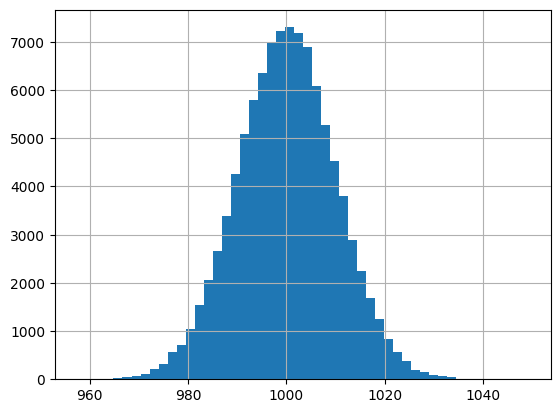

In [ ]:
data['price'].hist(bins=50)

In [ ]:
# первые 5% с начала и конца
quantile_05 = data['price'].quantile(0.05)
quantile_95 = data['price'].quantile(0.95)

quantile_05, quantile_95

(983.5200884999999, 1016.4325315)

In [ ]:
data_filtered = data[(data['price'] >= quantile_05) & (data['price'] <= quantile_95)]
data_filtered.head()

,price
0,1010.005807
1,997.384196
2,997.088963
3,1006.088979
4,998.465880


In [ ]:
# или можно так
data_filtered = data[data['price'].between(quantile_05, quantile_95)]  # включительно
data_filtered.head()

,price
0,1010.005807
1,997.384196
2,997.088963
3,1006.088979
4,998.465880


<Axes: >

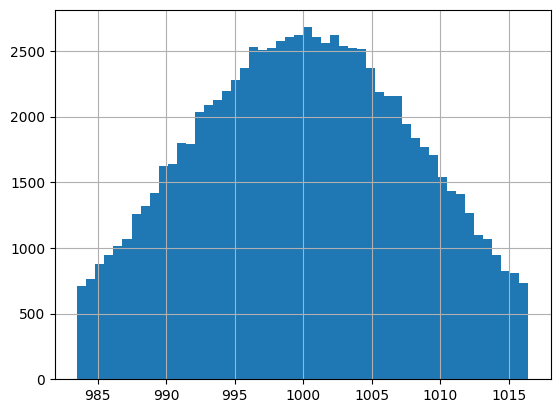

In [ ]:
data_filtered['price'].hist(bins=50)

# Пропуски
Первый подход, когда все они относятся к одной категории

In [ ]:
realty = pd.read_csv('/content/drive/My Drive/Colab Notebooks/realty.tsv', sep='\t')
realty

,Тип недвижимости,"Стоимость, млн. руб."
0,Элитная,57.5
1,Коммерческая,19.3
2,Элитная,NaN
3,Коммерческая,26.5
4,Элитная,87.0
5,Коммерческая,15.5
6,Жилая,6.8
7,Жилая,17.5
8,Коммерческая,32.0
9,Элитная,NaN


In [ ]:
# берем строки с пустыми значениями стоимости

null_rows = realty[pd.isnull(realty['Стоимость, млн. руб.'])]  # pd.isna

In [ ]:
# проверяем корректность фильтра

null_rows

,Тип недвижимости,"Стоимость, млн. руб."
2,Элитная,NaN
9,Элитная,NaN
12,Элитная,NaN
19,Элитная,NaN


In [ ]:
# дополнительно проверяем у каких типов недвижимости есть пропуски
null_rows['Тип недвижимости'].unique()

array(['Элитная'], dtype=object)

In [ ]:
# данные по элитной недвижимости

realty[realty['Тип недвижимости'] == 'Элитная']

,Тип недвижимости,"Стоимость, млн. руб."
0,Элитная,57.5
2,Элитная,NaN
4,Элитная,87.0
9,Элитная,NaN
12,Элитная,NaN
19,Элитная,NaN
22,Элитная,90.0


### Второй подход к пропускам
Проверим распределение пропуском по типам недвижимости

In [ ]:
realty_v2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/realty_v2.tsv', sep='\t')
realty_v2.head()

,Тип недвижимости,"Стоимость, млн. руб."
0,Жилая,NaN
1,Жилая,5.0
2,Коммерческая,28.0
3,Жилая,6.0
4,Жилая,20.0


In [ ]:
null_rows_v2 = realty_v2[pd.isnull(realty_v2['Стоимость, млн. руб.'])]
null_rows_v2

,Тип недвижимости,"Стоимость, млн. руб."
0,Жилая,NaN
17,Жилая,NaN
18,Коммерческая,NaN
31,Жилая,NaN
32,Коммерческая,NaN
...,...,...
1606,Жилая,NaN
1613,Коммерческая,NaN
1628,Жилая,NaN
1630,Жилая,NaN


In [ ]:
# распределение пропусков
null_rows_v2['Тип недвижимости'].value_counts(normalize=True)

Жилая           0.531579
Коммерческая    0.331579
Элитная         0.136842
Name: Тип недвижимости, dtype: float64

In [ ]:
# распределение по всем данным
realty_v2['Тип недвижимости'].value_counts(normalize=True)

Жилая           0.513694
Коммерческая    0.376141
Элитная         0.110164
Name: Тип недвижимости, dtype: float64

Как отфильтровать строки с пустыми значениями - используем инверсию фильтра с помощью значка тильда

In [ ]:
realty_v2[~pd.isnull(realty_v2['Стоимость, млн. руб.'])].head()

,Тип недвижимости,"Стоимость, млн. руб."
1,Жилая,5.0
2,Коммерческая,28.0
3,Жилая,6.0
4,Жилая,20.0
5,Элитная,90.0


### Заполняем пропуски медианами
Не особо автоматизированный способ, зато простой

In [ ]:
# посмотрим на каких строчках пропуски по жилой недвижимости

realty_v2[realty_v2['Тип недвижимости'] == 'Жилая'].head(15)

,Тип недвижимости,"Стоимость, млн. руб."
0,Жилая,NaN
1,Жилая,5.0
3,Жилая,6.0
4,Жилая,20.0
6,Жилая,11.0
8,Жилая,12.0
9,Жилая,14.0
10,Жилая,21.0
11,Жилая,6.0
12,Жилая,15.0


In [ ]:
# считаем медиану для жилой недвижимости

living_median = realty_v2[realty_v2['Тип недвижимости'] == 'Жилая']['Стоимость, млн. руб.'].median()
living_median

13.0

In [ ]:
# сложный фильтр, проверим результат сразу

realty_v2.loc[(realty_v2['Тип недвижимости'] == 'Жилая') & (pd.isnull(realty_v2['Стоимость, млн. руб.']))]

,Тип недвижимости,"Стоимость, млн. руб."
0,Жилая,NaN
17,Жилая,NaN
31,Жилая,NaN
86,Жилая,NaN
177,Жилая,NaN
...,...,...
1598,Жилая,NaN
1605,Жилая,NaN
1606,Жилая,NaN
1628,Жилая,NaN


In [ ]:
# заполняем пропуски медианой
realty_v2.loc[(realty_v2['Тип недвижимости'] == 'Жилая') & (pd.isnull(realty_v2['Стоимость, млн. руб.'])), 'Стоимость, млн. руб.'] = living_median

In [ ]:
realty_v2[realty_v2['Тип недвижимости'] == 'Жилая'].head(15)

,Тип недвижимости,"Стоимость, млн. руб."
0,Жилая,13.0
1,Жилая,5.0
3,Жилая,6.0
4,Жилая,20.0
6,Жилая,11.0
8,Жилая,12.0
9,Жилая,14.0
10,Жилая,21.0
11,Жилая,6.0
12,Жилая,15.0
